Install necessary libraries

In [3]:
!pip install pandas numpy matplotlib seaborn scikit-learn statsmodels


Mount the Drive

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Load the Data

In [5]:
import pandas as pd


train_path = '/content/drive/My Drive/train.csv'
test_path = '/content/drive/My Drive/test.csv'
sample_submission_path = '/content/drive/My Drive/sample_submission.csv'

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)
sample_submission = pd.read_csv(sample_submission_path)


Exploratory Data Analysis (EDA)

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


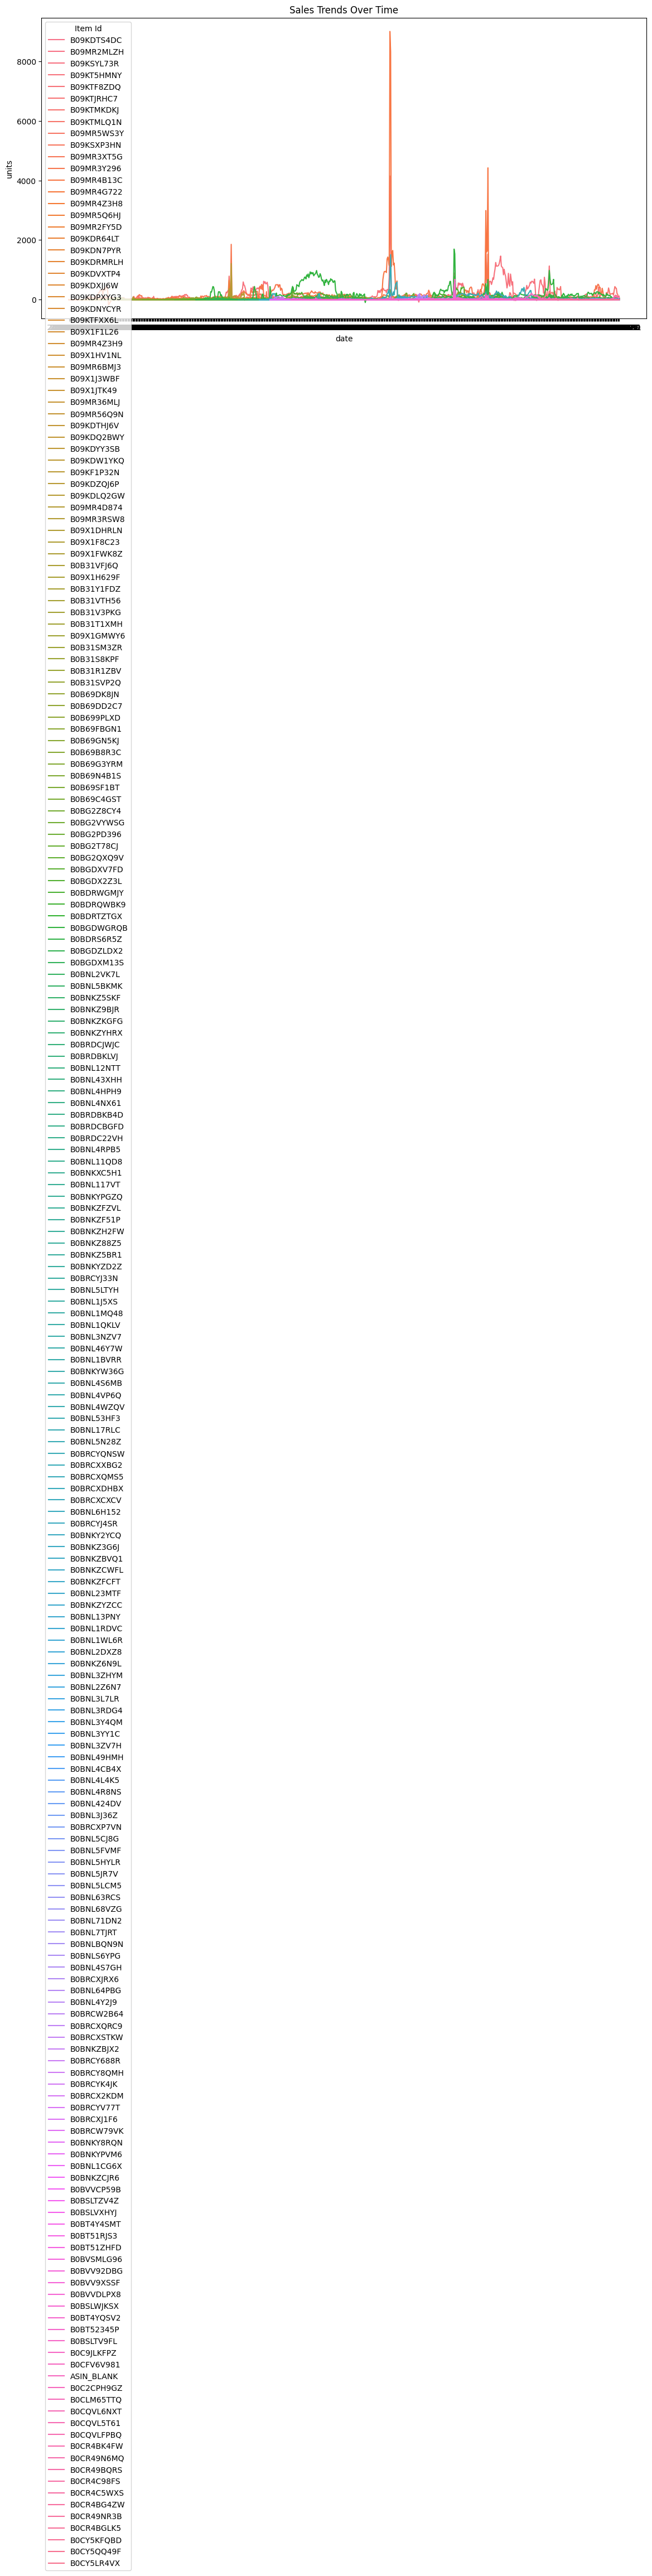

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Display the first few rows of the dataset
train_df.head()

# Summary statistics
train_df.describe()

# Check for missing values
train_df.isnull().sum()

# Plotting sales trends
plt.figure(figsize=(14, 7))
sns.lineplot(data=train_df, x='date', y='units', hue='Item Id')
plt.title('Sales Trends Over Time')
plt.show()


Feature Engineering

In [7]:
# Convert date column to datetime
train_df['date'] = pd.to_datetime(train_df['date'])
test_df['date'] = pd.to_datetime(test_df['date'])

# Extract date features
train_df['year'] = train_df['date'].dt.year
train_df['month'] = train_df['date'].dt.month
train_df['day'] = train_df['date'].dt.day
train_df['dayofweek'] = train_df['date'].dt.dayofweek

test_df['year'] = test_df['date'].dt.year
test_df['month'] = test_df['date'].dt.month
test_df['day'] = test_df['date'].dt.day
test_df['dayofweek'] = test_df['date'].dt.dayofweek

# Fill missing values if any (example)
train_df['ad_spend'].fillna(0, inplace=True)


Using the Prophet model from Facebook for time series forecasting

In [8]:
!pip install prophet

Time Series forecasting using Prophet

<ipython-input-9-16be03c5cde6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df_prophet.rename(columns={'date': 'ds', 'units': 'y'}, inplace=True)
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe_9hbver/3qu8e5yv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe_9hbver/t_o5fy2z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36823', 'data', 'file=/tmp/tmpe_9hbver/3qu8e5yv.json', 'init=/tmp/tmpe_9hbver/t_o5fy2z.json', 'output', 'file=/tmp/tmpe_9hbver/prophet_model51nx8xcm/prophet_model-20240802080138.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=100

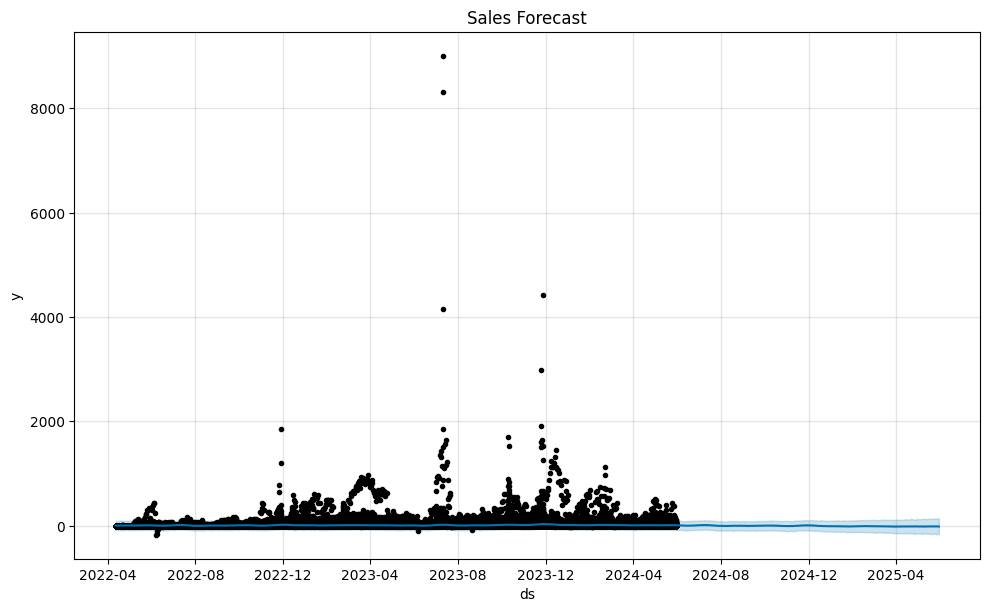

In [9]:
from prophet import Prophet

# Prepare data for Prophet
train_df_prophet = train_df[['date', 'units']]
train_df_prophet.rename(columns={'date': 'ds', 'units': 'y'}, inplace=True)

# Initialize and fit the model
model = Prophet()
model.fit(train_df_prophet)

# Create future dataframe
future = model.make_future_dataframe(periods=365)  # Adjust as needed
forecast = model.predict(future)

# Plot forecast
fig = model.plot(forecast)
plt.title('Sales Forecast')
plt.show()


Hyperparameter Tuning

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe_9hbver/q17ebo5f.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe_9hbver/mt2x8emt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19219', 'data', 'file=/tmp/tmpe_9hbver/q17ebo5f.json', 'init=/tmp/tmpe_9hbver/mt2x8emt.json', 'output', 'file=/tmp/tmpe_9hbver/prophet_model_c5nhyra/prophet_model-20240802080205.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:02:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:02:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in 

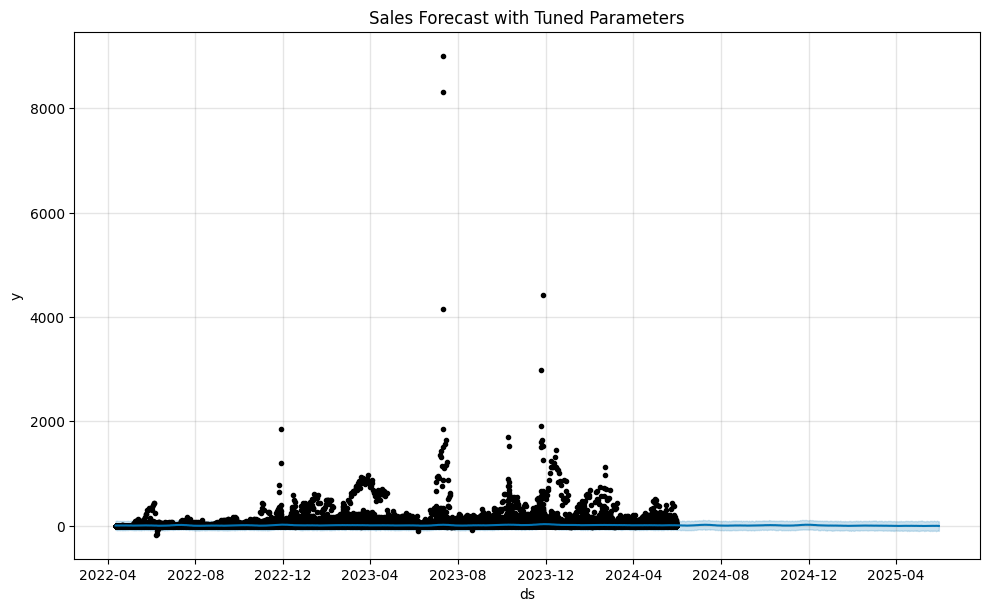

In [10]:
# Initialize and fit the model with custom parameters
model = Prophet(changepoint_prior_scale=0.1, seasonality_prior_scale=0.1)
model.fit(train_df_prophet)

# Create future dataframe
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

# Plot forecast
fig = model.plot(forecast)
plt.title('Sales Forecast with Tuned Parameters')
plt.show()


Forecasting

In [11]:
# Prepare test data for forecasting
test_df_prophet = test_df[['date']]
test_df_prophet.rename(columns={'date': 'ds'}, inplace=True)

# Predict
forecast_test = model.predict(test_df_prophet)
predictions = forecast_test[['ds', 'yhat']]
predictions.rename(columns={'ds': 'date', 'yhat': 'units'}, inplace=True)

# Save predictions
predictions.to_csv('/content/drive/MyDrive/sample_submission.csv', index=False)


<ipython-input-11-7aea6c23e701>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df_prophet.rename(columns={'date': 'ds'}, inplace=True)
<ipython-input-11-7aea6c23e701>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predictions.rename(columns={'ds': 'date', 'yhat': 'units'}, inplace=True)


In [12]:
# Generate predictions for the test set
test_df_prophet = test_df[['date']]
test_df_prophet.rename(columns={'date': 'ds'}, inplace=True)

# Predict using the trained model
forecast_test = model.predict(test_df_prophet)
predictions = forecast_test[['ds', 'yhat']]
predictions.rename(columns={'ds': 'date', 'yhat': 'units'}, inplace=True)

# Ensure the predictions include the ID column from the test set
predictions['ID'] = test_df['ID']

# Reorder columns to match the required format
predictions = predictions[['ID', 'units']]

# Save the predictions to CSV
predictions.to_csv('/content/drive/MyDrive/sample_submission.csv', index=False)


<ipython-input-12-5a43548a2483>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df_prophet.rename(columns={'date': 'ds'}, inplace=True)
<ipython-input-12-5a43548a2483>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predictions.rename(columns={'ds': 'date', 'yhat': 'units'}, inplace=True)
<ipython-input-12-5a43548a2483>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre

In [15]:
from prophet import Prophet
import pandas as pd
import numpy as np

# Load data
train_df = pd.read_csv('/content/drive/MyDrive/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/test.csv')

# Feature Engineering
train_df['date'] = pd.to_datetime(train_df['date'])
train_df['year'] = train_df['date'].dt.year
train_df['month'] = train_df['date'].dt.month
train_df['day'] = train_df['date'].dt.day
train_df['day_of_week'] = train_df['date'].dt.dayofweek

# Aggregate to daily level if not already
daily_sales = train_df.groupby('date').agg({
    'units': 'sum',
    'ad_spend': 'sum'
}).reset_index()

# Prepare the data for Prophet
daily_sales.rename(columns={'date': 'ds', 'units': 'y'}, inplace=True)

# Initialize the Prophet model with additional seasonality
model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False
)

# Add holidays or additional regressors if relevant
model.add_regressor('ad_spend')

# Fit the model
model.fit(daily_sales)

# Prepare test data
test_df['date'] = pd.to_datetime(test_df['date'])
test_df['year'] = test_df['date'].dt.year
test_df['month'] = test_df['date'].dt.month
test_df['day'] = test_df['date'].dt.day
test_df['day_of_week'] = test_df['date'].dt.dayofweek
test_df.rename(columns={'date': 'ds'}, inplace=True)

# Fill missing values in 'ad_spend' - Choose an appropriate method
test_df['ad_spend'].fillna(test_df['ad_spend'].mean(), inplace=True)  # Example: Filling with mean

# Make predictions
forecast = model.predict(test_df[['ds', 'ad_spend']])
predictions = forecast[['ds', 'yhat']].rename(columns={'ds': 'date', 'yhat': 'units'})

# Ensure the predictions include the ID column from the test set
predictions['ID'] = test_df['ID']

# Reorder columns to match the required format
predictions = predictions[['ID', 'units']]

# Save the predictions to CSV
predictions.to_csv('/content/drive/MyDrive/sample_submission.csv', index=False)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpe_9hbver/wgjlebky.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe_9hbver/36mfgwqb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29013', 'data', 'file=/tmp/tmpe_9hbver/wgjlebky.json', 'init=/tmp/tmpe_9hbver/36mfgwqb.json', 'output', 'file=/tmp/tmpe_9hbver/prophet_modelde6uwxy2/prophet_model-20240802084435.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:44:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:44:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
